In [9]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
newcm = LinearSegmentedColormap.from_list('ColorMap',color_list)
color_list2 = ["#2b83ba","#fdae61","#d36060","#83b692","#8E7891"] #["#2b83ba","#d7191c","#fdae61"]

/var/folders/9v/j2dwy_kx7c32vpw655tnps0r0000gp/T/ipykernel_45034/649115633.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


## Get data part 1

In [10]:
#get timeseries
df_list = []
for i in range(1,11):
    df = pd.read_parquet(f'./inference/dat/timeseries_{i}.pq')
    df_list.append(df)
df_ts = pd.concat(df_list)

#get inference
df_list = []
for i in range(1,11):
    df = pd.read_parquet(f'./inference/dat/loglikelihood_{i}.pq')
    df_list.append(df)
df_ll = pd.concat(df_list)

## Plot part 1

Text(0.75, 0.85, '$\\nu + 1$')

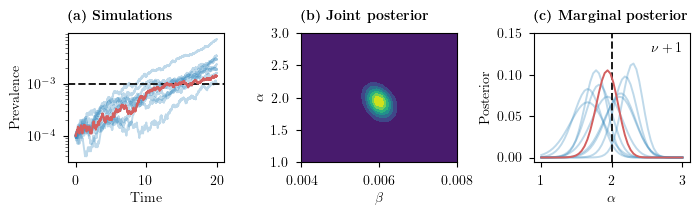

In [11]:
#plot
width = 7.057
height = width/3.5
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)

idx = 1
#timeseries
for i in range(1,11):
    df_ = df_ts[df_ts['exp_id'] == i].copy()
    if i == idx:
        axes[0].semilogy(df_['time'],df_['prevalence'], color=color_list2[2], alpha=1, zorder=3)
    else:
        axes[0].semilogy(df_['time'],df_['prevalence'], color=color_list2[0], alpha=0.3)
axes[0].axhline(df_ts['cut'].unique(), color='#1a1a1a', ls='--') 
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Prevalence')   

#joint
df_ = df_ll[df_ll['exp_id'] == idx]
Beta = df_['beta'].to_numpy().reshape((50,30))
Nu = df_['nu'].to_numpy().reshape((50,30))
LL = df_['ll'].to_numpy().reshape((50,30))
im = axes[1].contourf(Beta,Nu,np.exp(LL))
axes[1].set_xlabel(r'$\beta$')
axes[1].set_ylabel(r'$\alpha$')

#marginal
for i in range(1,11):
    df_ = df_ll[df_ll['exp_id'] == i].copy()
    df_['likelihood'] = np.exp(df_['ll'])
    df_ = df_.groupby(by=['nu']).mean().reset_index()
    df_['likelihood'] /= df_['likelihood'].sum()
    if i == idx:
        axes[2].plot(df_['nu'],df_['likelihood'], color=color_list2[2], alpha=1, zorder=3)
    else:
        axes[2].plot(df_['nu'],df_['likelihood'], color=color_list2[0], alpha=0.3)
axes[2].axvline(2,color='#1a1a1a', ls='--')
axes[2].set_xlabel(r'$\alpha$')
axes[2].set_ylabel('Posterior')   
axes[2].set_ylim(top=0.15)

#text
axes[0].text(0, 1.1, fr"\textbf{{(a) Simulations}}", fontsize=font_size, transform=axes[0].transAxes)
axes[1].text(0, 1.1, fr'\textbf{{(b) Joint posterior}}', fontsize=font_size, transform=axes[1].transAxes)
axes[2].text(0, 1.1, fr'\textbf{{(c) Marginal posterior}}', fontsize=font_size, transform=axes[2].transAxes)
axes[2].text(0.75, 0.85, r'$\nu + 1$', fontsize=font_size, transform=axes[2].transAxes)


## Get data part 2

In [13]:
#get inference
df_list = []
cases = ['v1','v2','v3']
for v in cases:
    for i in range(1,11):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_real_net_{v}_{i}.pq')
        df['case'] = v
        df_list.append(df)
df_ll = pd.concat(df_list)

In [14]:
df_ll

,beta,nu,ll,exp_id,case
0,0.004000,0.3,-71.453545,1,v1
1,0.004138,0.3,-64.502395,1,v1
2,0.004276,0.3,-58.120451,1,v1
3,0.004414,0.3,-52.271562,1,v1
4,0.004552,0.3,-46.922918,1,v1
...,...,...,...,...,...
1495,0.004586,3.5,-40.449646,10,v3
1496,0.004690,3.5,-43.880656,10,v3
1497,0.004793,3.5,-47.443078,10,v3
1498,0.004897,3.5,-51.131299,10,v3


## Plot part 2

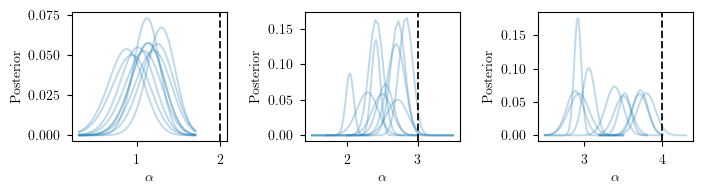

In [15]:
#plot
width = 7.057
height = width/3.5
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)

for j,v in enumerate(cases):
    df_ll_ = df_ll[df_ll['case'] == v].drop(columns=['case'])
    for i in range(1,11):
        df_ = df_ll_[df_ll_['exp_id'] == i].copy()
        df_['likelihood'] = np.exp(df_['ll'])
        df_ = df_.groupby(by=['nu']).mean().reset_index()
        df_['likelihood'] /= df_['likelihood'].sum()
        axes[j].plot(df_['nu'],df_['likelihood'], color=color_list2[0], alpha=0.3)
    axes[j].set_xlabel(r'$\alpha$')
    axes[j].set_ylabel('Posterior')   


axes[0].axvline(2,color='#1a1a1a', ls='--')
axes[1].axvline(3,color='#1a1a1a', ls='--')
axes[2].axvline(4,color='#1a1a1a', ls='--')

Text(0, 1.1, '\\textbf{(d) Contagion on a coauthorship hypergraph}')

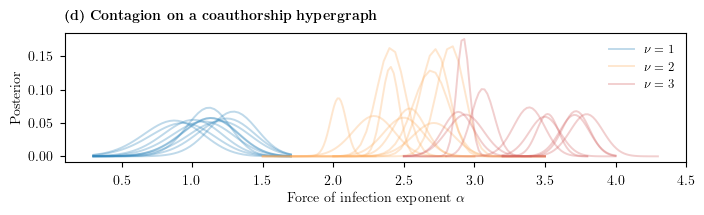

In [16]:
#plot
width = 7.057
height = width/3.5
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)

for j,v in enumerate(cases):
    df_ll_ = df_ll[df_ll['case'] == v].drop(columns=['case'])
    for i in range(1,11):
        df_ = df_ll_[df_ll_['exp_id'] == i].copy()
        df_['likelihood'] = np.exp(df_['ll'])
        df_ = df_.groupby(by=['nu']).mean().reset_index()
        df_['likelihood'] /= df_['likelihood'].sum()
        if i == 1:
            ax.plot(df_['nu'],df_['likelihood'], color=color_list2[j], alpha=0.3,
                   label=fr'$\nu = {1+j}$')
        else:
            ax.plot(df_['nu'],df_['likelihood'], color=color_list2[j], alpha=0.3,
                   label=None)
ax.legend(frameon=False)
ax.set_xlabel(r'Force of infection exponent $\alpha$')
ax.set_ylabel('Posterior')   

#text
ax.text(0, 1.1, fr"\textbf{{(d) Contagion on a coauthorship hypergraph}}", fontsize=font_size, transform=ax.transAxes)
